In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler # Responsável pela normalização dos dados

import statsmodels.formula.api as smf

# Extração


In [4]:
# Importando arquivo
df = pd.read_excel(r'/Cópia de imoveis.xlsx')

In [6]:
df.head(15)

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000
5,366.22,20000
6,300.69,30000
7,470.98,25000
8,373.13,40000
9,343.12,50000


In [7]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


# Análise exploratória

### Verifica a distribuição das variáveis com histogramas

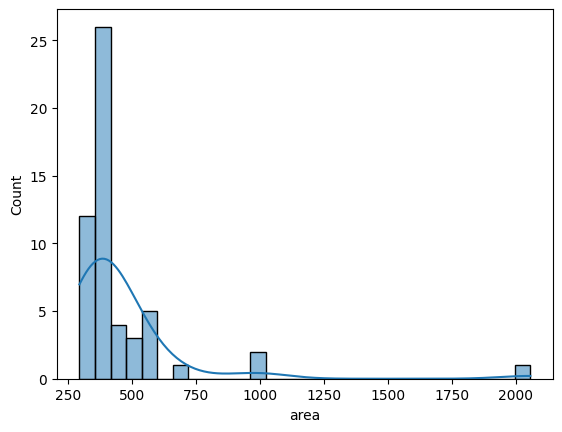

In [10]:
sns.histplot(df, x='area', kde=True);

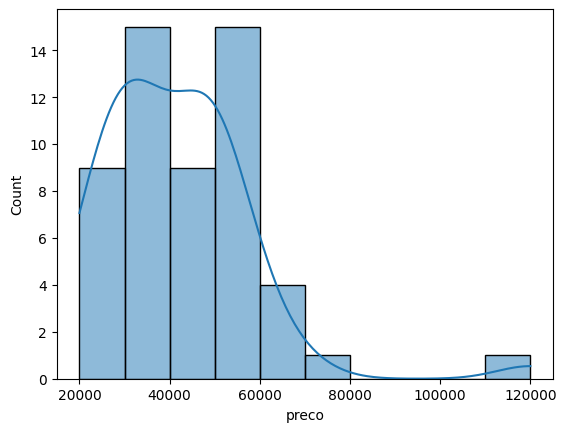

In [12]:
sns.histplot(df, x='preco', kde=True);

In [13]:
df.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


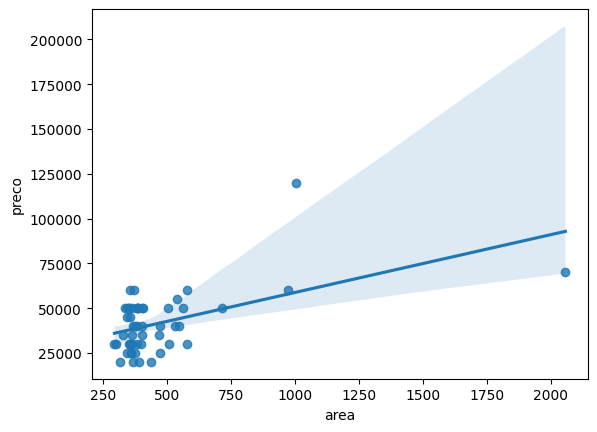

In [15]:
# Plota um grafico de regressão
sns.regplot(x='area', y='preco', data=df);

### Transfoma os dados para escala logaritma, de 0 a 1 para melhor distribuição dos valores

In [16]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [22]:
# Normaliza os dados com o MinMaxScales do scikit, podendo utilizar o np.exp do numpy.
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns) # Transforma a base já em escala logaritma, mantendo index e colunas

In [24]:
df_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


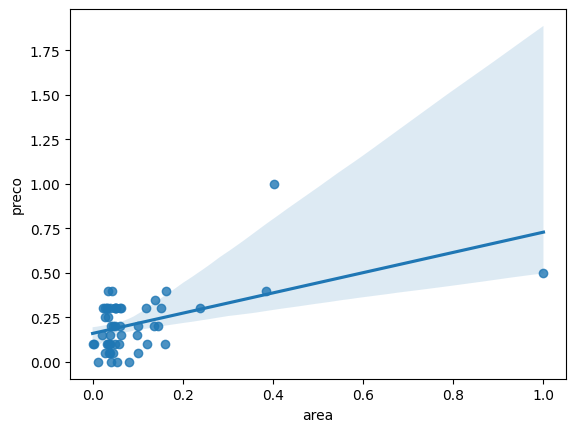

In [26]:
sns.regplot(x='area', y='preco', data=df_norm);

# Construindo modelo

In [28]:
# Construindo modelo com statsmodels

function = 'preco~area'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           7.76e-05
Time:                        20:26:53   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [29]:
# Separando variáveis
x = df_norm[['area']]
y = df_norm[['preco']]

In [38]:
# Separando base
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20, random_state=42)

In [39]:
# Criando o algorítimo de machine learning
lr = LinearRegression()
lr.fit(x_treino, y_treino)
LinearRegression()

LinearRegression()

In [40]:
# Plotando resultados
r_sq = lr.score(x_treino, y_treino)
print(r_sq)

0.2754399686961232


In [41]:
# Outros Resultados
y_pred_treino = lr.predict(x_treino)
print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RSAE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.1068423059800295
MSE: 0.019987119738590717
RSAE: 0.1413758103021543


In [42]:
lr.fit(x_teste, y_teste)

LinearRegression()

In [44]:
y_pred_teste = lr.predict(x_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_teste))
print('RSAE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RSAE: 0.13216900408268478
